<a href="https://colab.research.google.com/github/VarunPratapSinghLodhi/varundemofirst/blob/main/varunpratapsingh0801ca221075.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive


In [3]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/BTC-2017min.csv'
df = pd.read_csv(path)


Mounted at /content/drive


In [4]:
df.shape

(2713, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


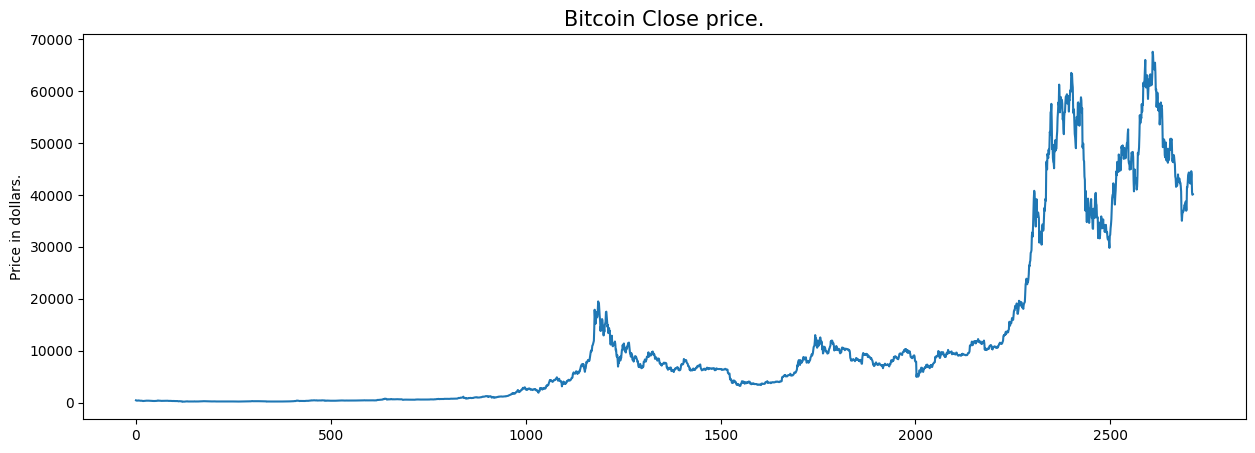

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


# New Section

In [9]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [10]:
df[df['Close'] == df['Adj Close']].shape, df.shape


((2713, 7), (2713, 7))

In [11]:
df = df.drop(['Adj Close'], axis=1)


In [12]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

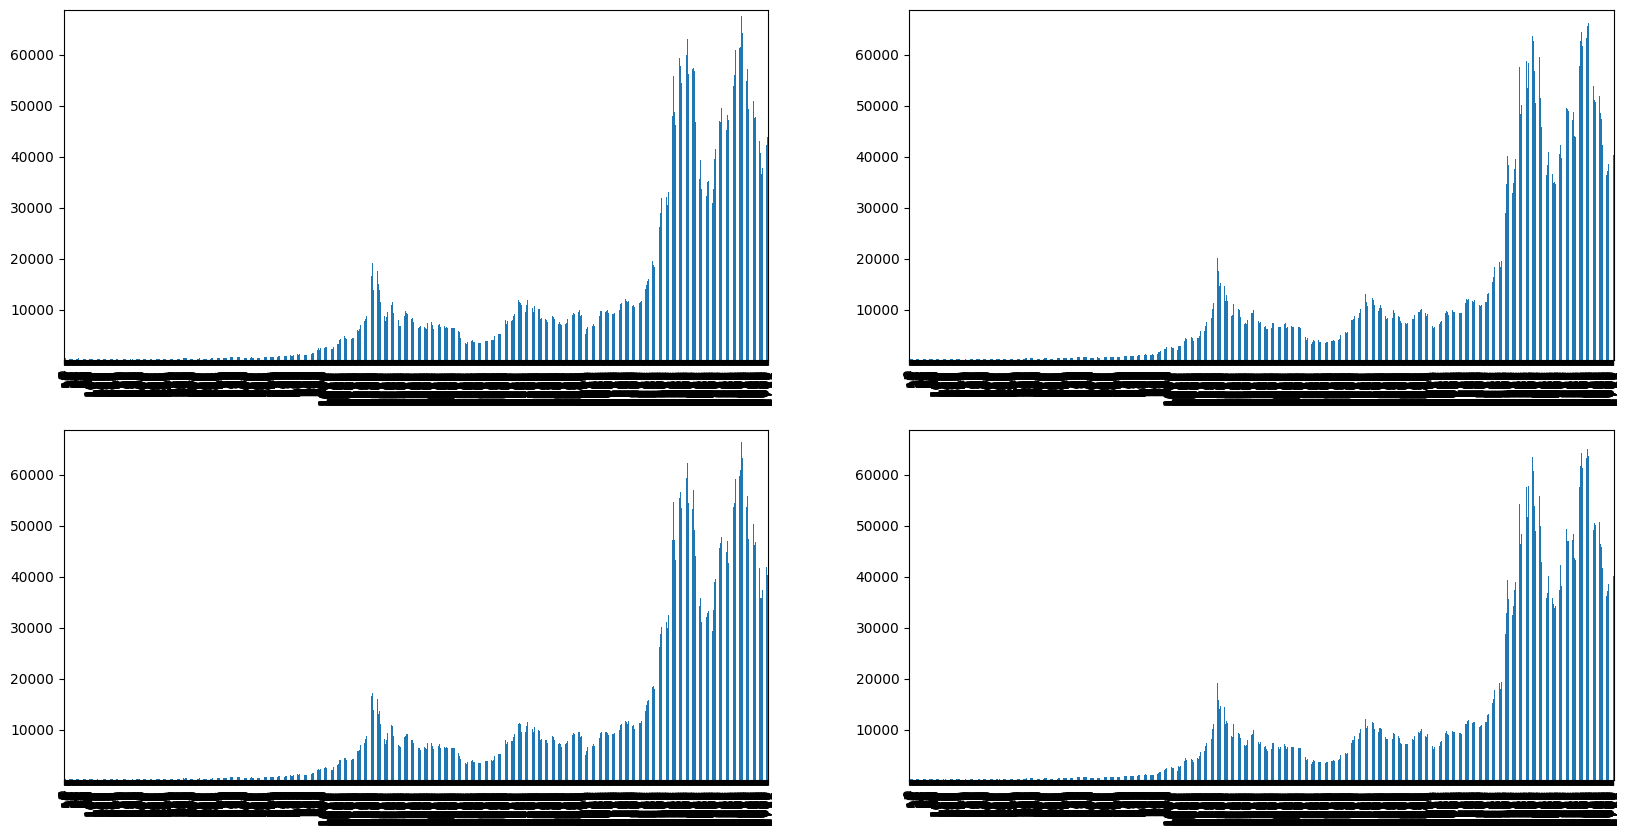

In [13]:
min_value = df[['Open', 'High', 'Low', 'Close']].min().min()
max_value = df[['Open', 'High', 'Low', 'Close']].max().max()

plt.subplots(figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    df[col].plot.bar()
    plt.ylim(min_value, max_value)  # Set y-axis limits to ensure the data is within the visible range

plt.show()



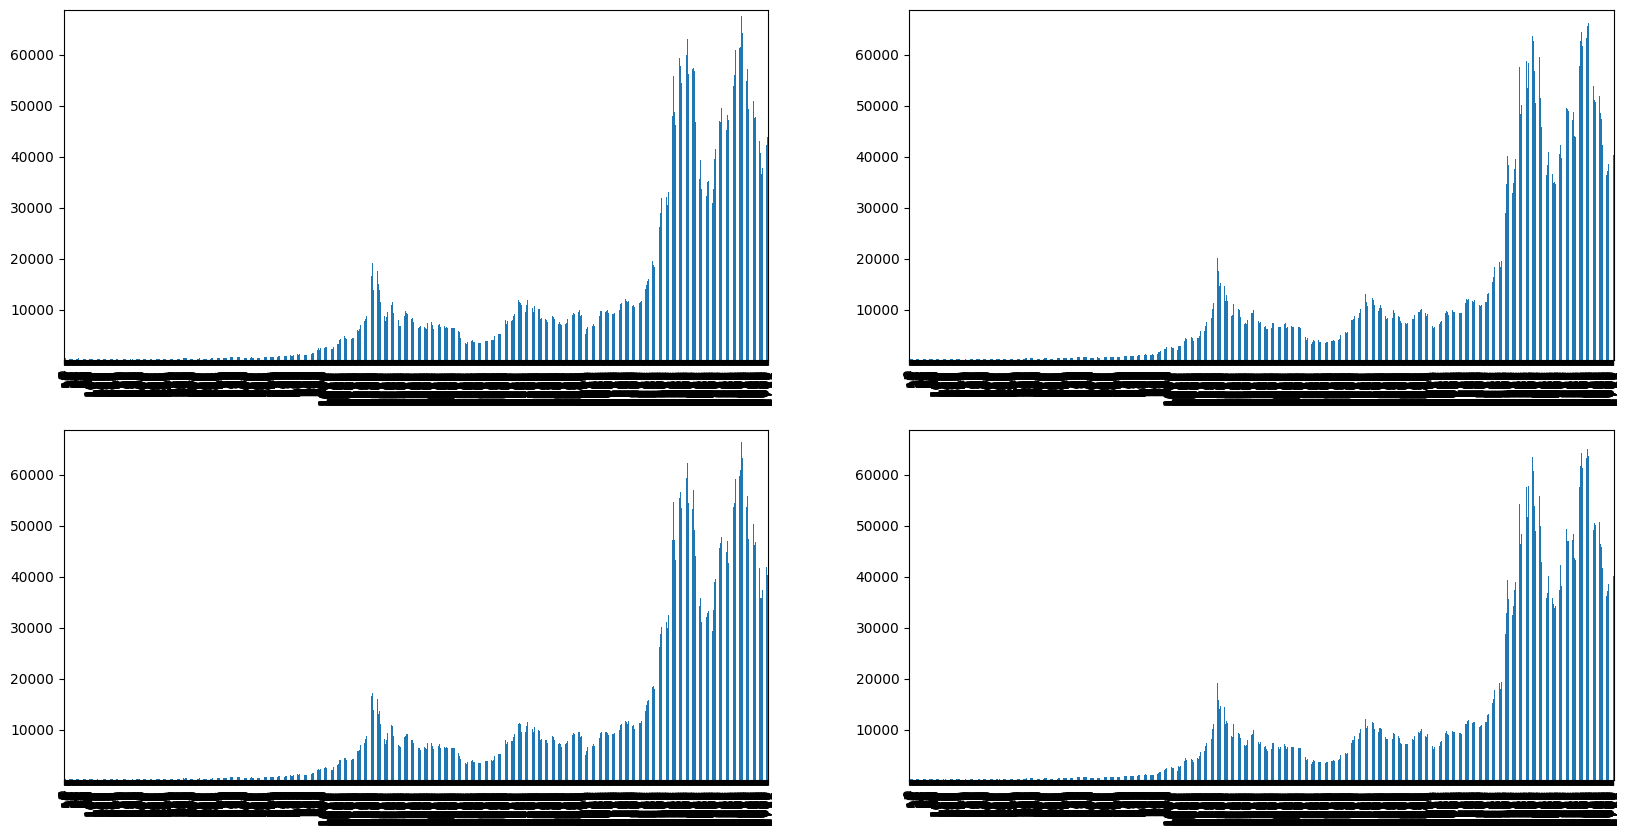

In [14]:
import matplotlib.pyplot as plt

features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20, 10))

min_value = df[features].min().min()
max_value =df[features].max().max()

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df[col].plot.bar()
    plt.ylim(min_value, max_value)  # Set y-axis limits to ensure the data is within the visible range

plt.show()



In [15]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


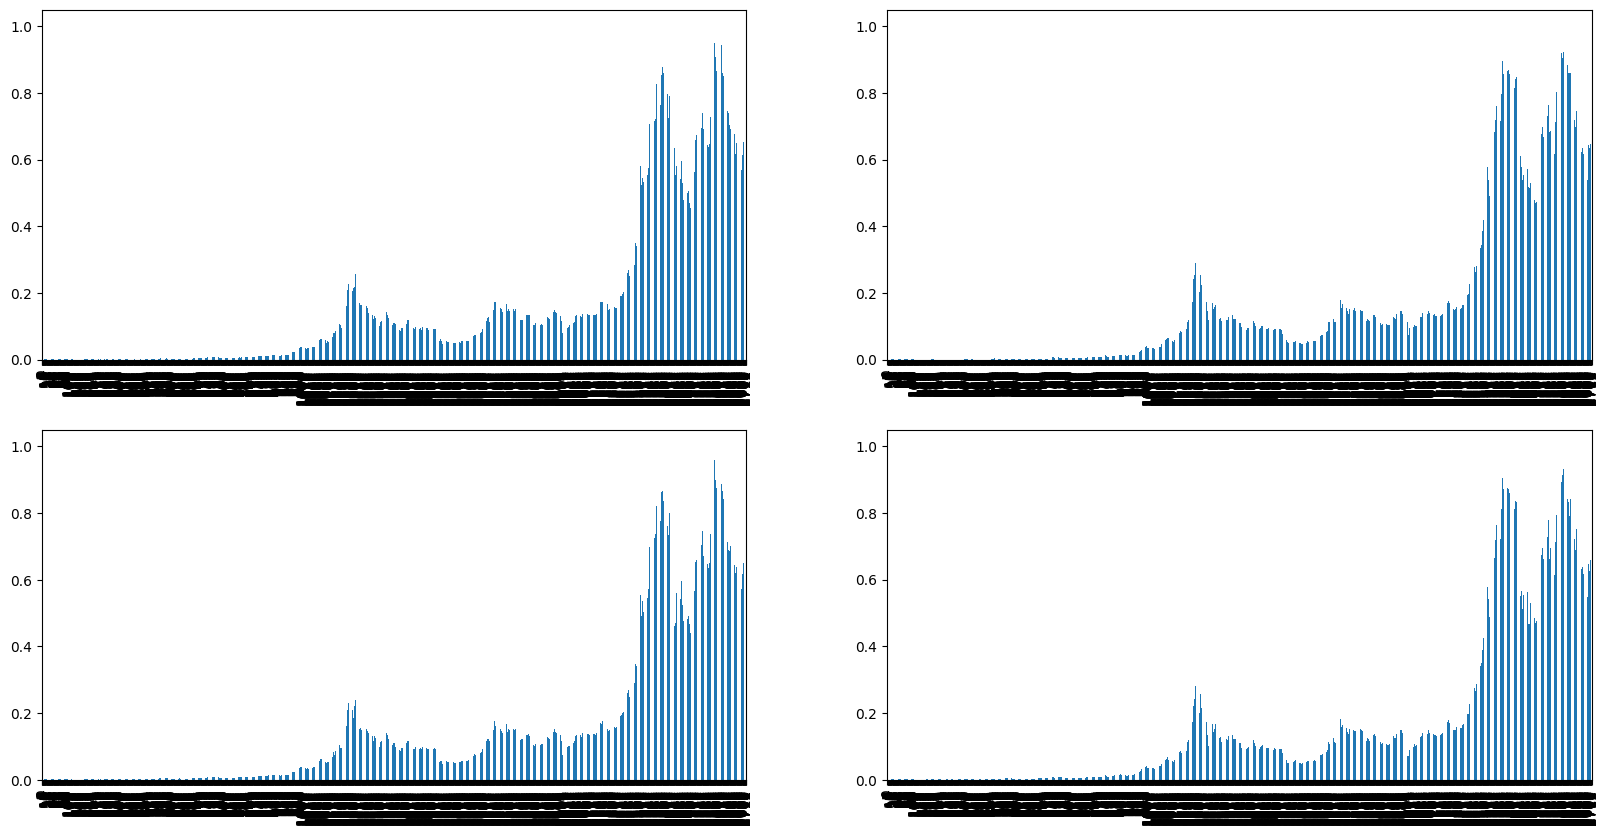

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

plt.subplots(figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    df_normalized[col].plot.bar()

plt.show()



In [17]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [18]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


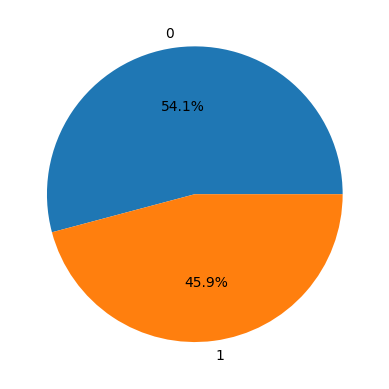

In [19]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


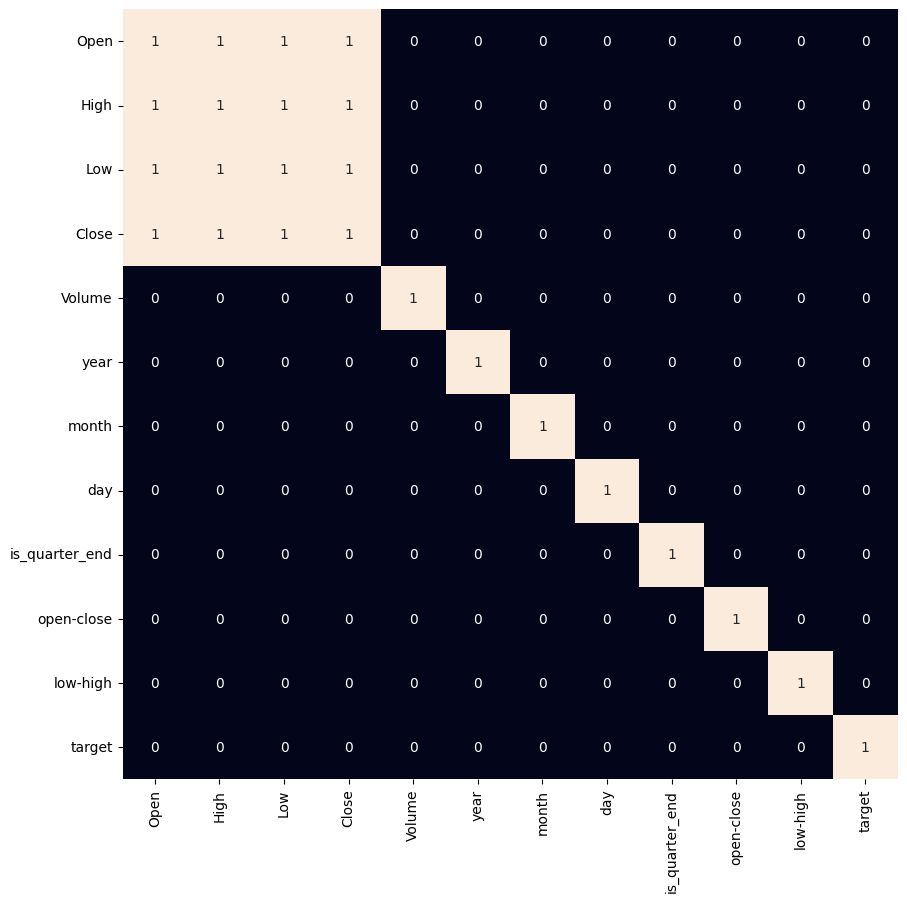

In [20]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [21]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2441, 3) (272, 3)


In [22]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9229563497439509
Validation Accuracy :  0.46156758803483533



<Figure size 1200x600 with 0 Axes>

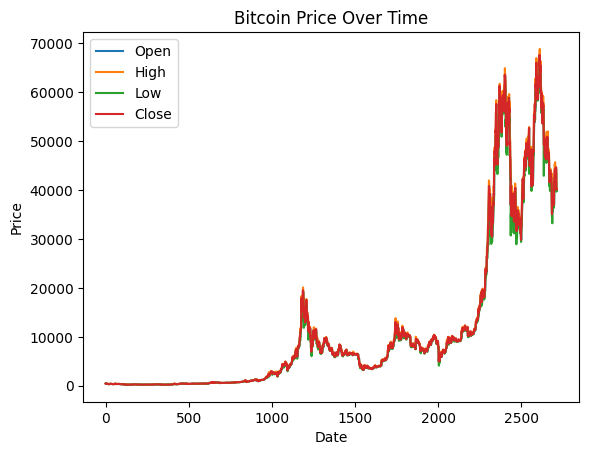

In [23]:
bitcoin_data = df[['Open', 'High', 'Low', 'Close']]

# Line plot to visualize the trend of each feature over time
plt.figure(figsize=(12, 6))
bitcoin_data.plot()
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['Open', 'High', 'Low', 'Close'])
plt.show()

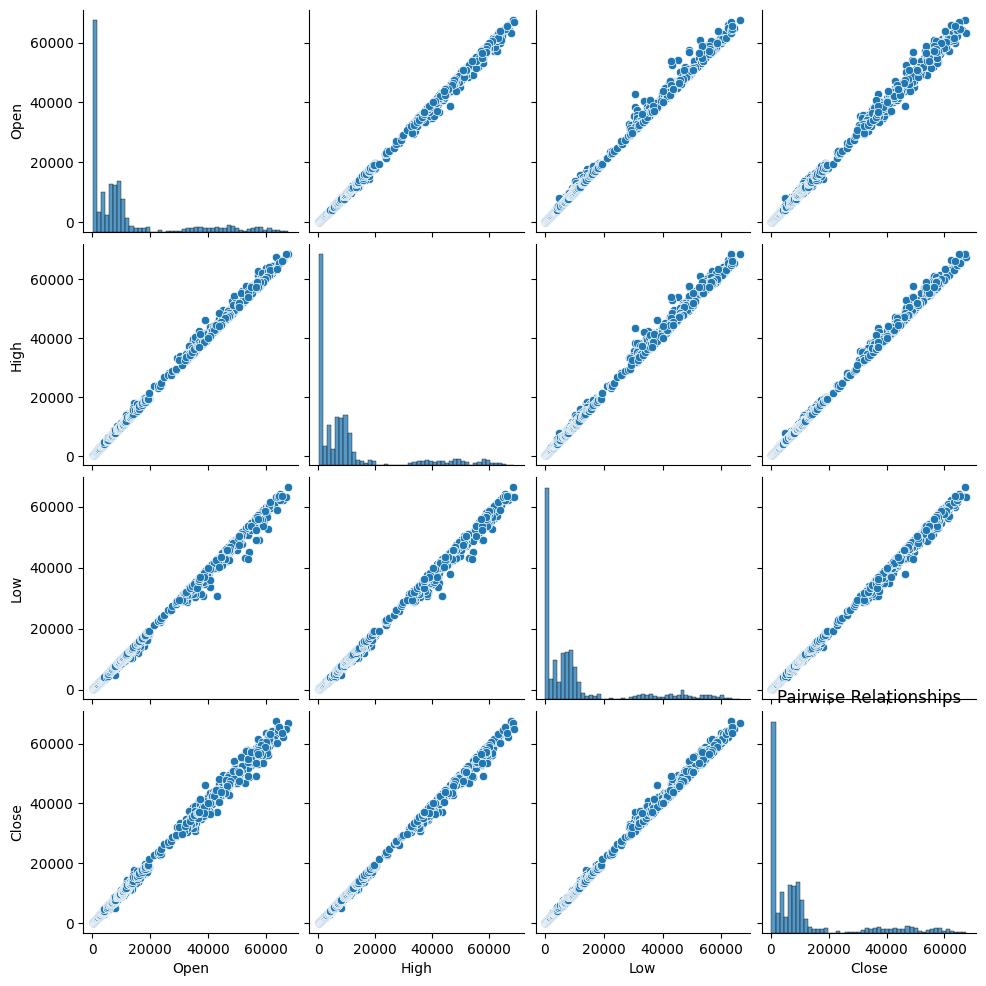

In [24]:
sb.pairplot(bitcoin_data)
plt.title("Pairwise Relationships")
plt.show()


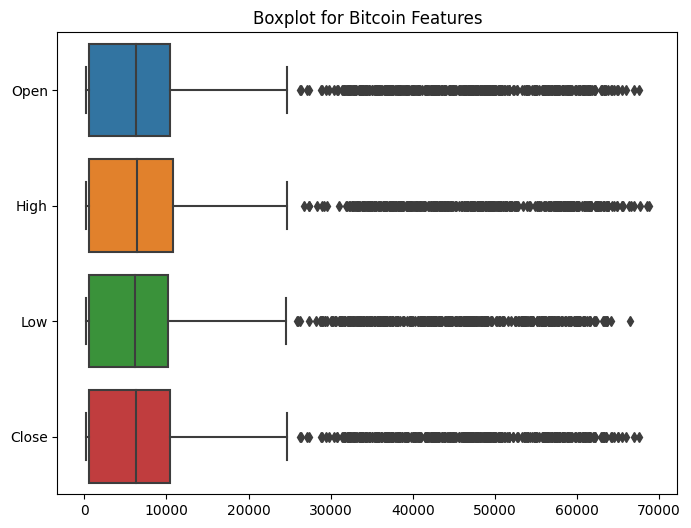

In [25]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=bitcoin_data, orient="h")
plt.title("Boxplot for Bitcoin Features")
plt.show()

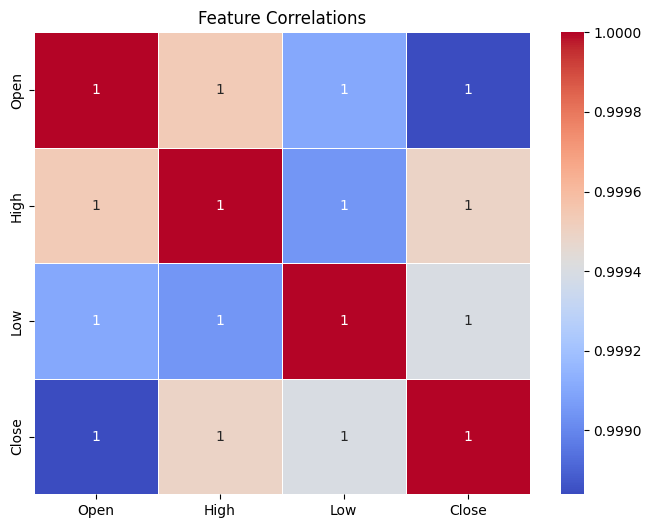

In [27]:
# Heatmap to visualize feature correlations
correlation_matrix = bitcoin_data.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()


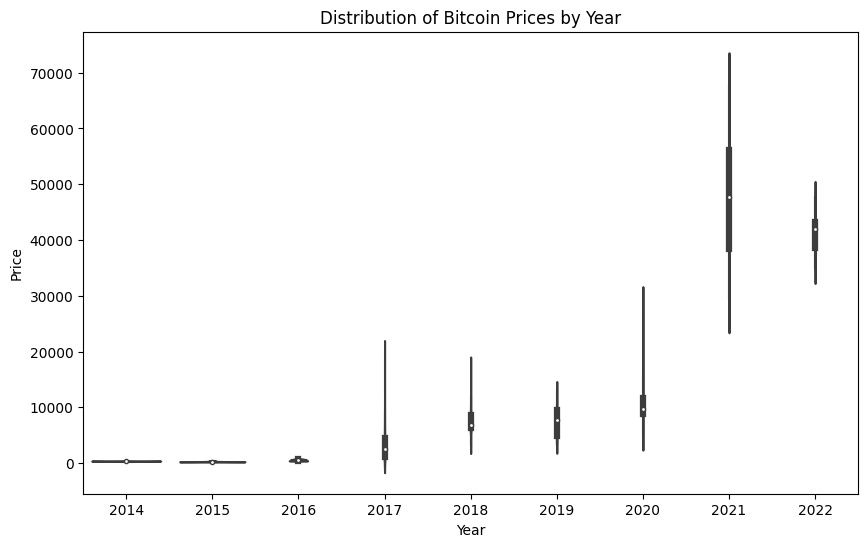

In [28]:
# Violin plot to compare the distribution of Bitcoin prices by 'year'
plt.figure(figsize=(10, 6))
sb.violinplot(x='year', y='Close', data=df)
plt.title("Distribution of Bitcoin Prices by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


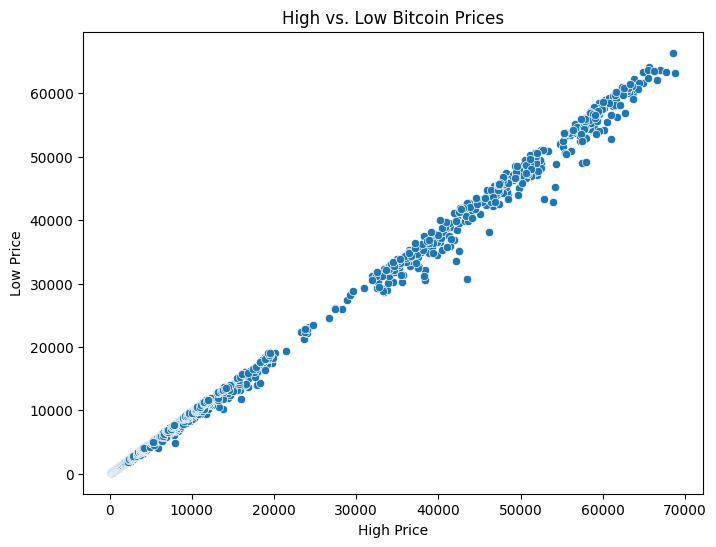

In [30]:
# Scatter plot to visualize the relationship between 'High' and 'Low' prices
plt.figure(figsize=(8, 6))
sb.scatterplot(data=df, x='High', y='Low')
plt.title("High vs. Low Bitcoin Prices")
plt.xlabel("High Price")
plt.ylabel("Low Price")
plt.show()


LogisticRegression() : 
Training ROC-AUC :  0.5272665077085648
Validation ROC-AUC :  0.5194460972575323


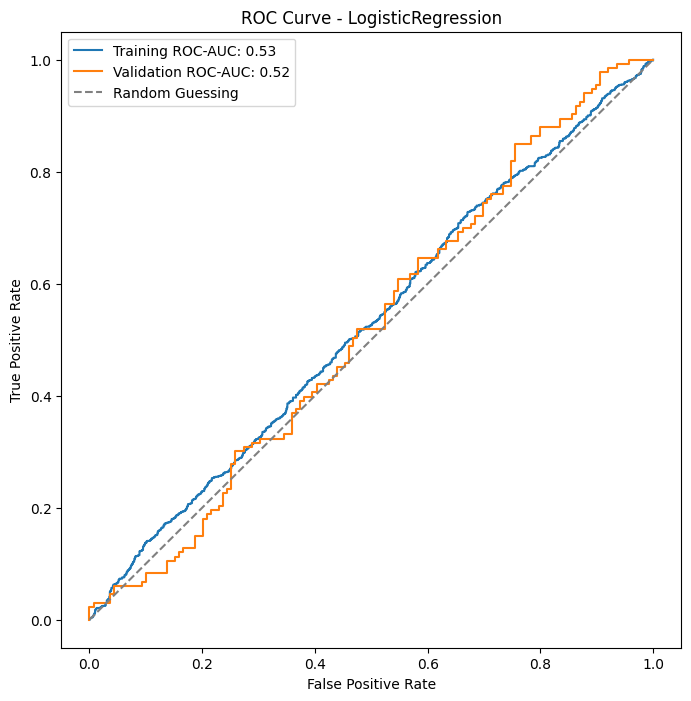

Training Confusion Matrix for LogisticRegression:
 [[  34 1071]
 [  39 1297]]
Validation Confusion Matrix for LogisticRegression:
 [[  6 133]
 [  1 132]]
Training Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.47      0.03      0.06      1105
           1       0.55      0.97      0.70      1336

    accuracy                           0.55      2441
   macro avg       0.51      0.50      0.38      2441
weighted avg       0.51      0.55      0.41      2441

Validation Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.86      0.04      0.08       139
           1       0.50      0.99      0.66       133

    accuracy                           0.51       272
   macro avg       0.68      0.52      0.37       272
weighted avg       0.68      0.51      0.37       272

--------------------------------------------------
SVC(kernel='poly', probabil

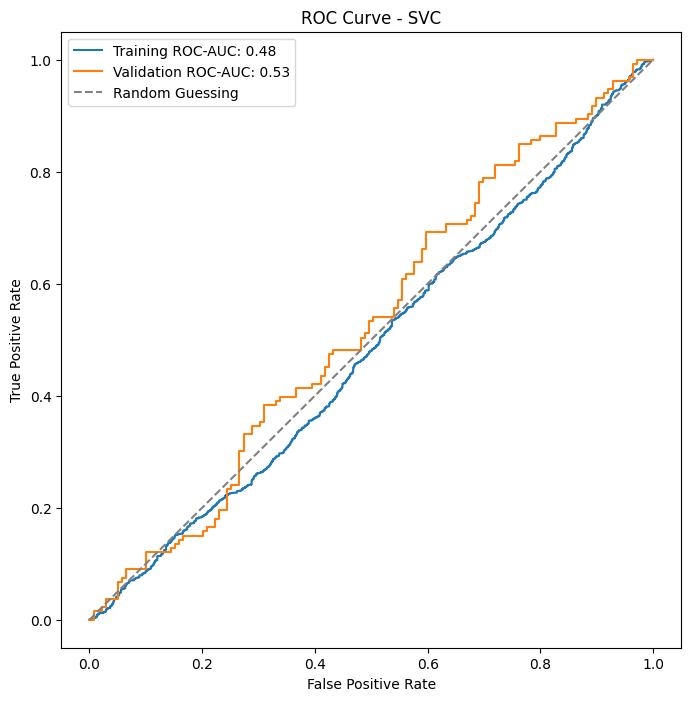

Training Confusion Matrix for SVC:
 [[   8 1097]
 [   4 1332]]
Validation Confusion Matrix for SVC:
 [[  1 138]
 [  0 133]]
Training Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.67      0.01      0.01      1105
           1       0.55      1.00      0.71      1336

    accuracy                           0.55      2441
   macro avg       0.61      0.50      0.36      2441
weighted avg       0.60      0.55      0.39      2441

Validation Classification Report for SVC:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       139
           1       0.49      1.00      0.66       133

    accuracy                           0.49       272
   macro avg       0.75      0.50      0.34       272
weighted avg       0.75      0.49      0.33       272

--------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_by

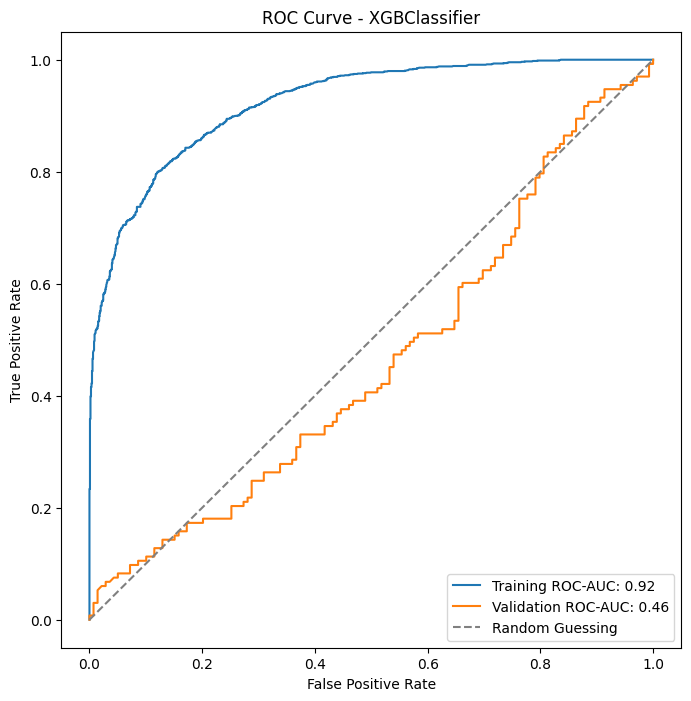

Training Confusion Matrix for XGBClassifier:
 [[ 853  252]
 [ 160 1176]]
Validation Confusion Matrix for XGBClassifier:
 [[56 83]
 [65 68]]
Training Classification Report for XGBClassifier:
               precision    recall  f1-score   support

           0       0.84      0.77      0.81      1105
           1       0.82      0.88      0.85      1336

    accuracy                           0.83      2441
   macro avg       0.83      0.83      0.83      2441
weighted avg       0.83      0.83      0.83      2441

Validation Classification Report for XGBClassifier:
               precision    recall  f1-score   support

           0       0.46      0.40      0.43       139
           1       0.45      0.51      0.48       133

    accuracy                           0.46       272
   macro avg       0.46      0.46      0.45       272
weighted avg       0.46      0.46      0.45       272

--------------------------------------------------


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming you have a DataFrame df with the required columns
# Replace df with your actual DataFrame

# Define features and target
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)

# Define models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Train and evaluate models
for model in models:
    model.fit(X_train, Y_train)

    # Predict probabilities for both training and validation sets
    train_probs = model.predict_proba(X_train)[:, 1]
    valid_probs = model.predict_proba(X_valid)[:, 1]

    # Calculate ROC-AUC scores
    train_roc_auc = metrics.roc_auc_score(Y_train, train_probs)
    valid_roc_auc = metrics.roc_auc_score(Y_valid, valid_probs)

    print(f'{model} : ')
    print('Training ROC-AUC : ', train_roc_auc)
    print('Validation ROC-AUC : ', valid_roc_auc)

    # Generate and plot ROC curve
    fpr_train, tpr_train, _ = roc_curve(Y_train, train_probs)
    fpr_valid, tpr_valid, _ = roc_curve(Y_valid, valid_probs)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr_train, tpr_train, label=f'Training ROC-AUC: {train_roc_auc:.2f}')
    plt.plot(fpr_valid, tpr_valid, label=f'Validation ROC-AUC: {valid_roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model.__class__.__name__}')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    train_conf_matrix = confusion_matrix(Y_train, y_train_pred)
    valid_conf_matrix = confusion_matrix(Y_valid, y_valid_pred)

    print(f'Training Confusion Matrix for {model.__class__.__name__}:\n', train_conf_matrix)
    print(f'Validation Confusion Matrix for {model.__class__.__name__}:\n', valid_conf_matrix)

    # Classification Report
    train_classification_report = classification_report(Y_train, y_train_pred)
    valid_classification_report = classification_report(Y_valid, y_valid_pred)

    print(f'Training Classification Report for {model.__class__.__name__}:\n', train_classification_report)
    print(f'Validation Classification Report for {model.__class__.__name__}:\n', valid_classification_report)

    print('-' * 50)
